# Import dataset

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import numpy as np

In [3]:
data_dir = 'dataset/'
batch_size = 24
img_height = 144
img_width = 256
validation_split = 0.1

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  # color_mode='grayscale',
  validation_split=validation_split,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  # color_mode='grayscale',
  validation_split=validation_split,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 64080 files belonging to 3 classes.
Using 57672 files for training.
Found 64080 files belonging to 3 classes.
Using 6408 files for validation.
['Modern', 'Photoreal', 'Retro']


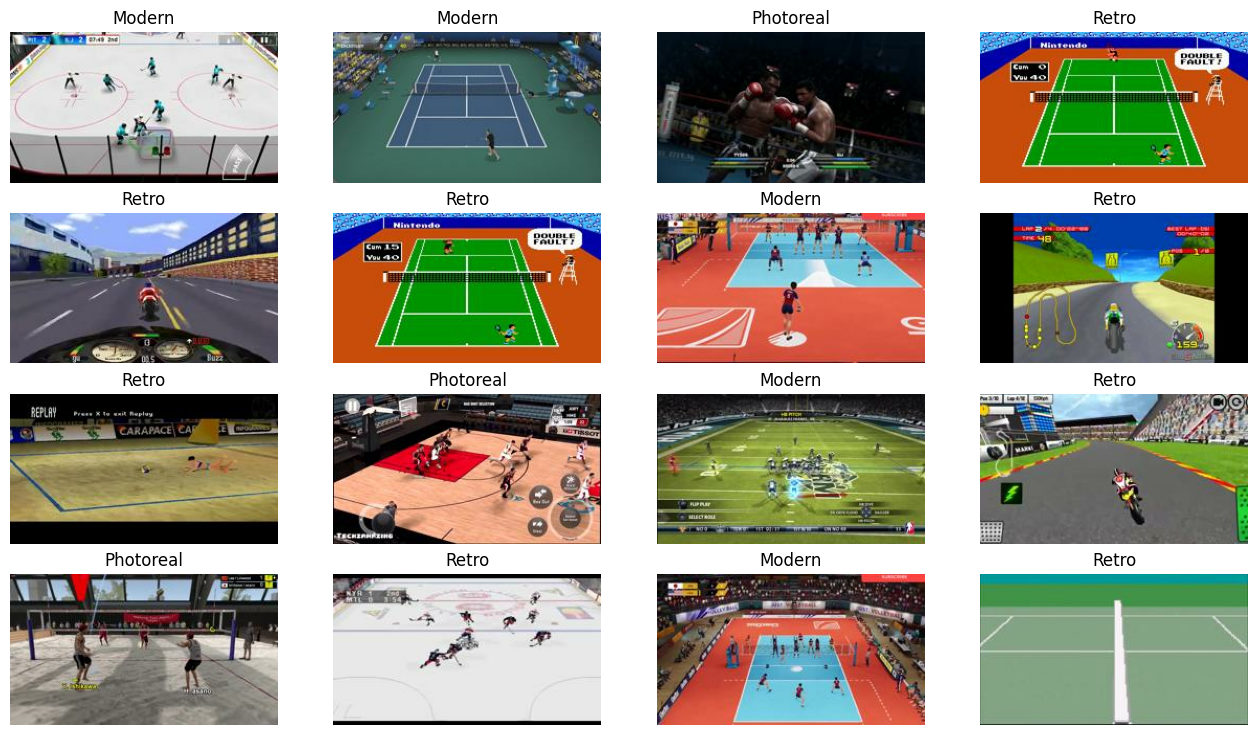

In [4]:
plt.figure(figsize=(16, 9))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    img = images[i].numpy().astype(np.uint8)
    plt.imshow(img) #, cmap=plt.cm.gray)
    plt.title(class_names[labels[i]])
    plt.axis("off")

# ANN Model

In [8]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

train_ds = train_ds.cache()
val_ds = val_ds.cache()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(144, 256, 1)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [18]:
model.fit(train_ds, epochs=5)

Epoch 1/5


2136/2136 [==============================] - 274s 128ms/step - loss: 1.0603 - accuracy: 0.7738
Epoch 2/5
2136/2136 [==============================] - 268s 126ms/step - loss: 0.3296 - accuracy: 0.8827
Epoch 3/5
2136/2136 [==============================] - 268s 125ms/step - loss: 0.2401 - accuracy: 0.9170
Epoch 4/5
2136/2136 [==============================] - 267s 125ms/step - loss: 0.1988 - accuracy: 0.9323
Epoch 5/5
2136/2136 [==============================] - 253s 119ms/step - loss: 0.1633 - accuracy: 0.9450


In [22]:
model.save_weights('./model_weights/weights_0')

In [7]:
model.load_weights('./model_weights/weights_0')

In [9]:
val_loss, val_acc = model.evaluate(val_ds)
print('Accuracy on test dataset:', val_acc)



534/534 [==============================] - 4s 7ms/step - loss: 0.1225 - accuracy: 0.9591
Accuracy on test dataset: 0.959113597869873


Modern 0.35
Photoreal 0.077
Retro 0.573


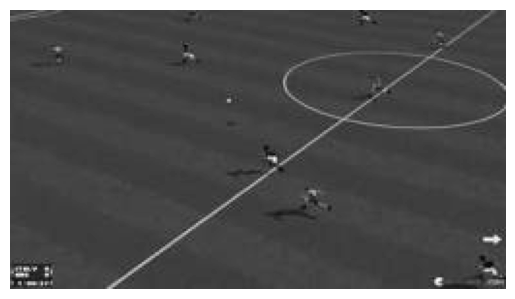

In [33]:
img_path = 'dataset/Retro/retro_12393.jpg'

img = Image.open(img_path).convert('L')
img = np.asarray(img)
plt.imshow(img, cmap=plt.cm.gray)
plt.axis("off")
img, label = normalize(img, 0)
test = img[None,:,:]
predictions = model(test)
for i in range(3):
    print(class_names[i], round(predictions.numpy()[0][i], 3))

# CNN Model

In [5]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

train_ds = train_ds.cache()
val_ds = val_ds.cache()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (17, 17), activation='relu', input_shape=(144, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (9, 9), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# model.summary()

In [7]:
model.fit(train_ds, epochs=5)

Epoch 1/5


 106/2403 [>.............................] - ETA: 1:03:37 - loss: 1.8270 - accuracy: 0.4167

KeyboardInterrupt: 

In [ ]:
model.save_weights('./model_weights/weights_0')

In [ ]:
val_loss, val_acc = model.evaluate(val_ds)
print('Accuracy on test dataset:', val_acc)